In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

swe_fname = '170103_Spokane.csv'

In [2]:
swe_df = pd.read_csv(swe_fname)
swe_df

,date,1983,1984,1985,1986,1987,1988,1989,1990,1991,...,2022,Min,10%,30%,70%,90%,Max,Median ('91-'20),Median (POR),Median Peak SWE
0,10-01,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.1,0.5,0.0,0.0,27.8
1,10-02,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.1,0.5,0.0,0.0,27.8
2,10-03,0.1,0.0,0.0,0.0,0.4,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.2,0.5,0.0,0.0,27.8
3,10-04,0.1,0.0,0.0,0.0,0.4,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.2,0.6,0.0,0.0,27.8
4,10-05,0.1,0.0,0.0,0.0,0.3,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.2,0.7,0.0,0.0,27.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,09-26,0.0,0.2,0.0,0.1,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,27.8
362,09-27,0.0,0.2,0.0,0.2,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.3,0.0,0.0,27.8
363,09-28,0.0,0.2,0.0,0.4,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,27.8
364,09-29,0.0,0.2,0.0,0.4,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,0.1,0.4,0.0,0.0,27.8


In [3]:
dates = swe_df['date']
dates

0      10-01
1      10-02
2      10-03
3      10-04
4      10-05
       ...  
361    09-26
362    09-27
363    09-28
364    09-29
365    09-30
Name: date, Length: 366, dtype: object

In [4]:
dates_dt = pd.DataFrame(pd.to_datetime(dates+'-2024', format='%m-%d-%Y'))
dates_dt[dates_dt['date'].dt.month >= 10] = dates_dt[dates_dt['date'].dt.month >= 10] - pd.DateOffset(years=1)
dates_dt

,date
0,2023-10-01
1,2023-10-02
2,2023-10-03
3,2023-10-04
4,2023-10-05
...,...
361,2024-09-26
362,2024-09-27
363,2024-09-28
364,2024-09-29


In [5]:
in_2_mm = 25.4

swe_min = swe_df['Min']*in_2_mm
swe_max = swe_df['Max']*in_2_mm
swe_10 = swe_df['10%']*in_2_mm
swe_30 = swe_df['30%']*in_2_mm
swe_median = swe_df['Median (\'91-\'20)']*in_2_mm
swe_70 = swe_df['70%']*in_2_mm
swe_90 = swe_df['90%']*in_2_mm
swe_maxmed = swe_df['Median Peak SWE'][0]*in_2_mm

swe_maxdate = pd.to_datetime('04-04-2024', format='%m-%d-%Y')

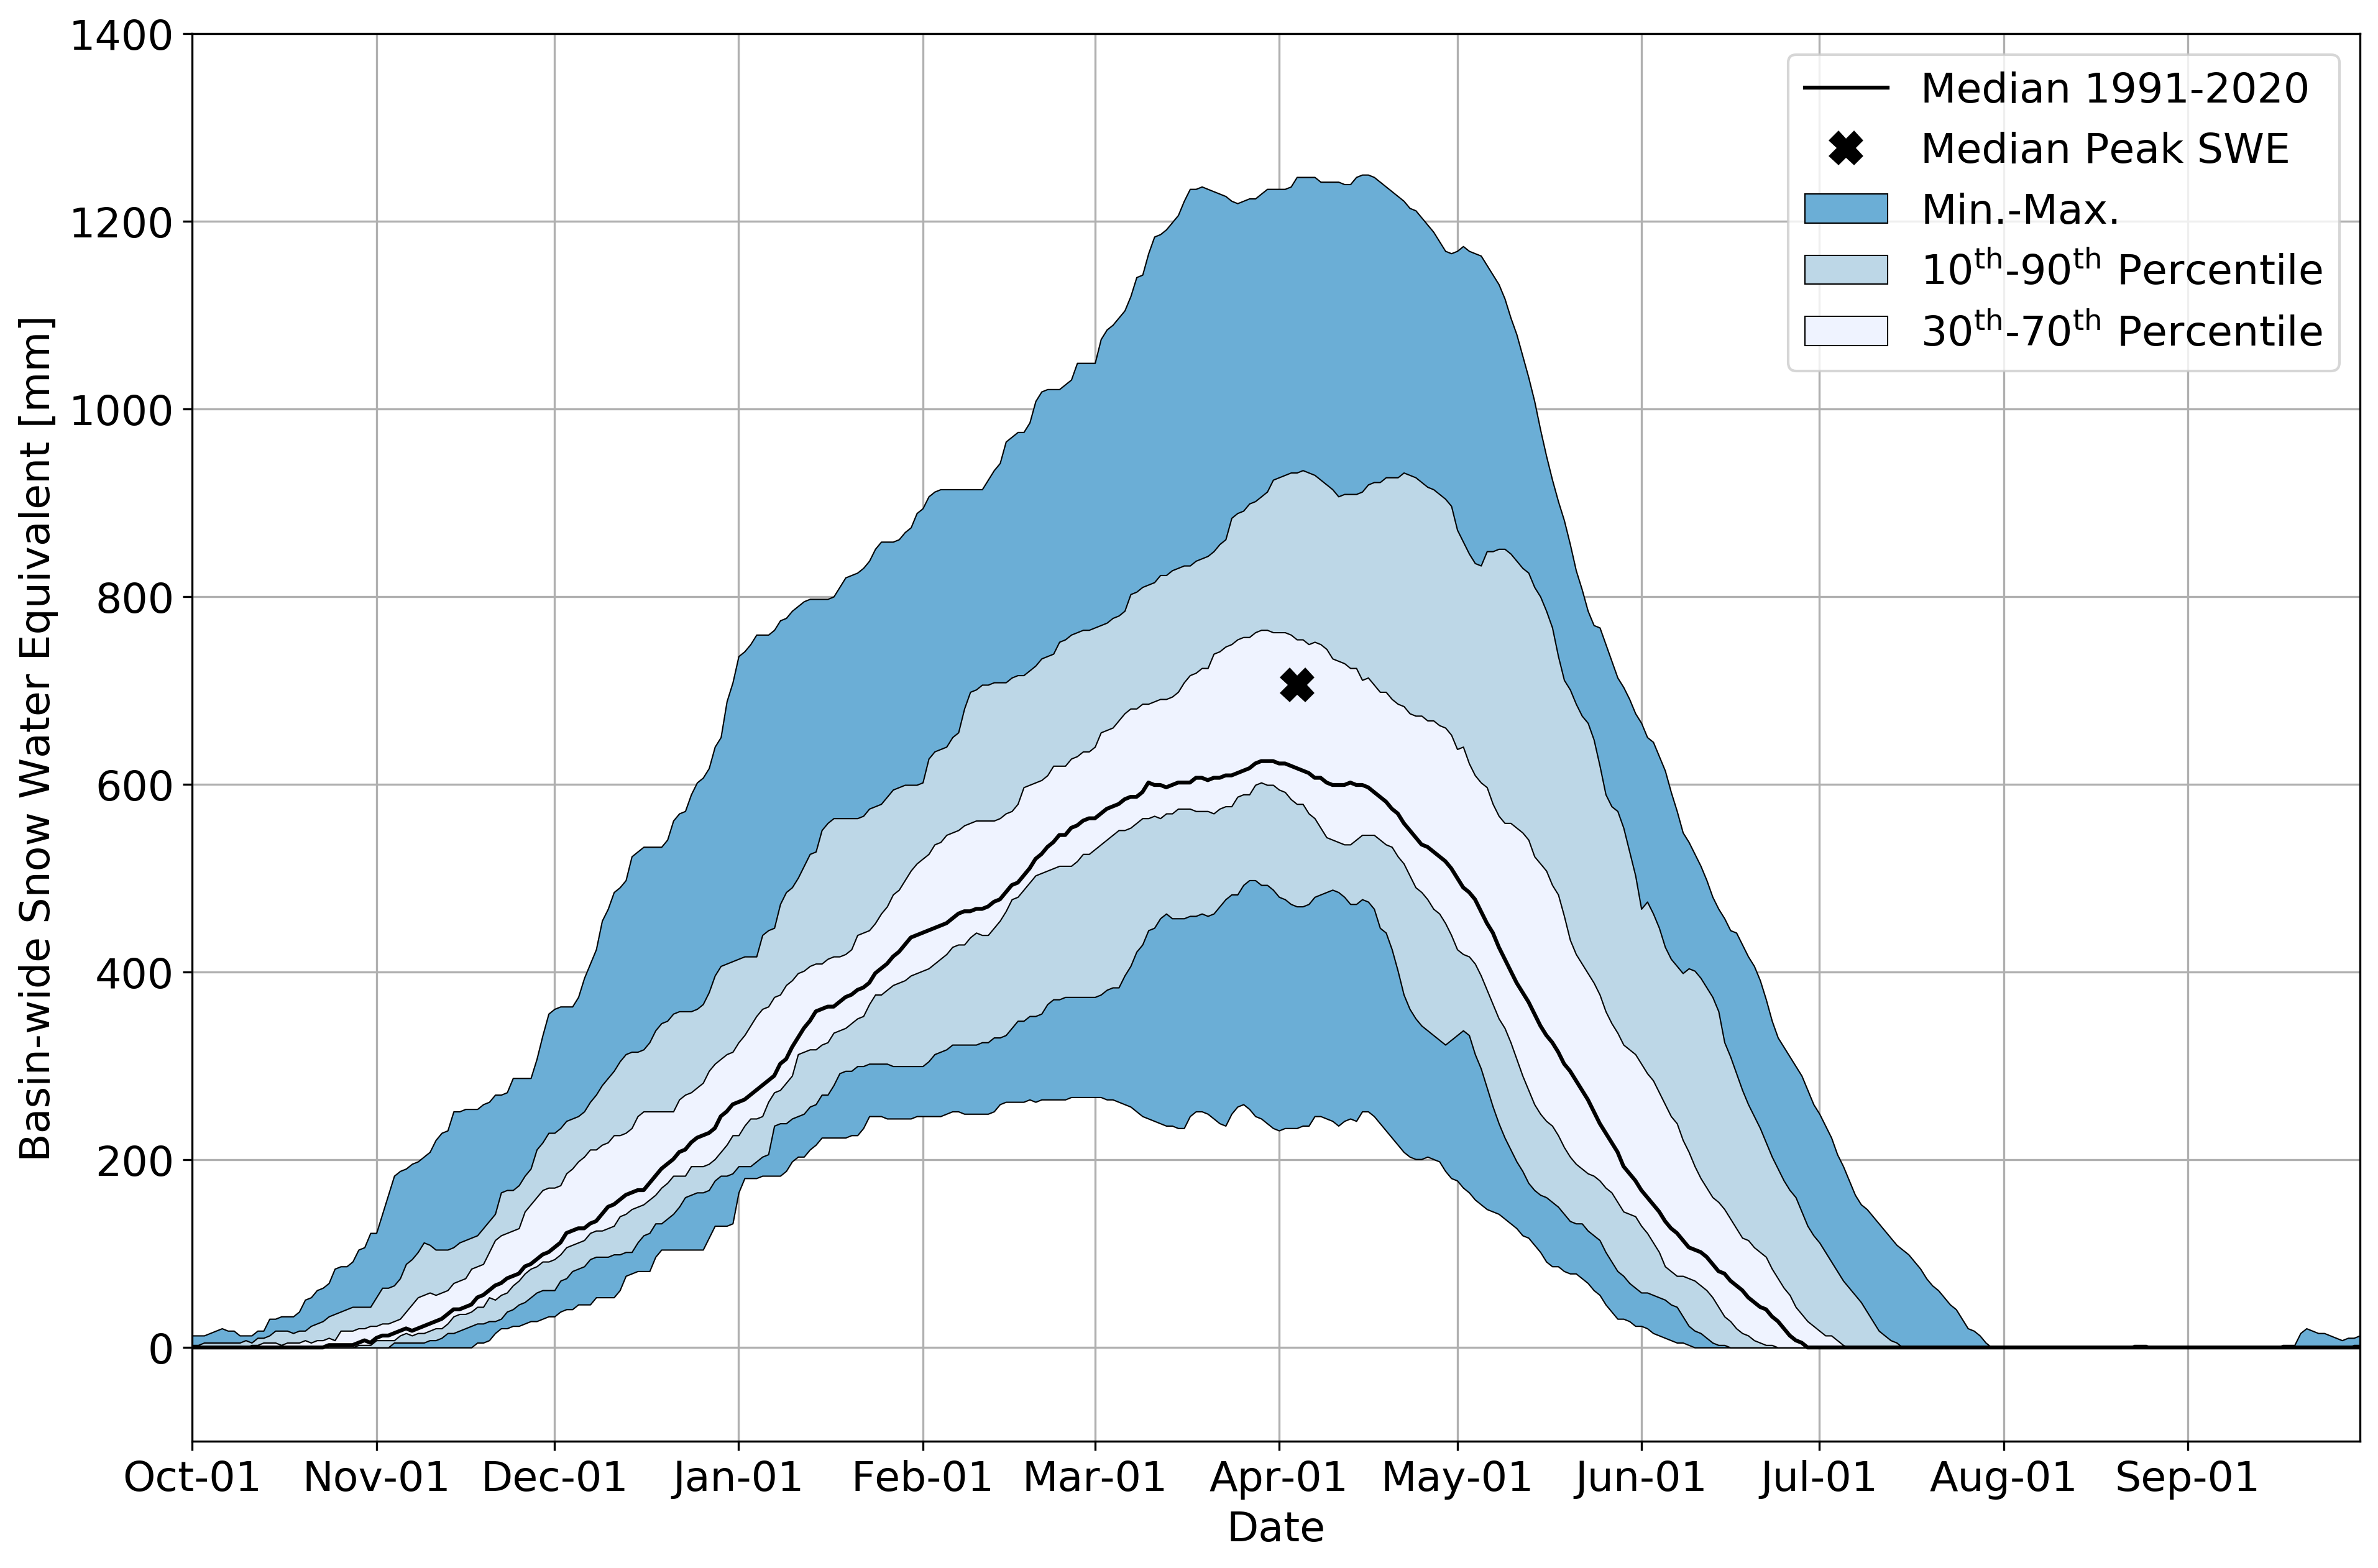

In [6]:
plt.figure(figsize=(15,10),dpi=300)
plt.rcParams.update({'font.size': 16})

plt.fill_between(dates_dt['date'].values, swe_max, swe_min, edgecolor='k', linewidth=0.5, facecolor='#6baed6', label='Min.-Max.', zorder=2.5)
plt.fill_between(dates_dt['date'].values, swe_90, swe_10, edgecolor='k', linewidth=0.5, facecolor='#bdd7e7', label='10${}^{\mathrm{th}}$-90${}^{\mathrm{th}}$ Percentile', zorder=2.5)
plt.fill_between(dates_dt['date'].values, swe_70, swe_30, edgecolor='k', linewidth=0.5, facecolor='#eff3ff', label='30${}^{\mathrm{th}}$-70${}^{\mathrm{th}}$ Percentile', zorder=2.5)
plt.plot(dates_dt['date'].values, swe_median, color='k', linewidth=1.5, label='Median 1991-2020', zorder=2.5)
plt.plot(swe_maxdate, swe_maxmed, marker='X', linewidth=0, markersize=12, color='k', label='Median Peak SWE', zorder=2.5)

plt.grid(zorder=-10)
plt.legend()

plt.xlim([pd.to_datetime('10-01-2023', format='%m-%d-%Y'), pd.to_datetime('09-30-2024', format='%m-%d-%Y')])
plt.xlabel('Date')
plt.ylim([-100.0,1400.0])
plt.ylabel('Basin-wide Snow Water Equivalent [mm]')

ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))

plt.savefig('Spokane_SWE_v1.png', bbox_inches='tight')
plt.show()


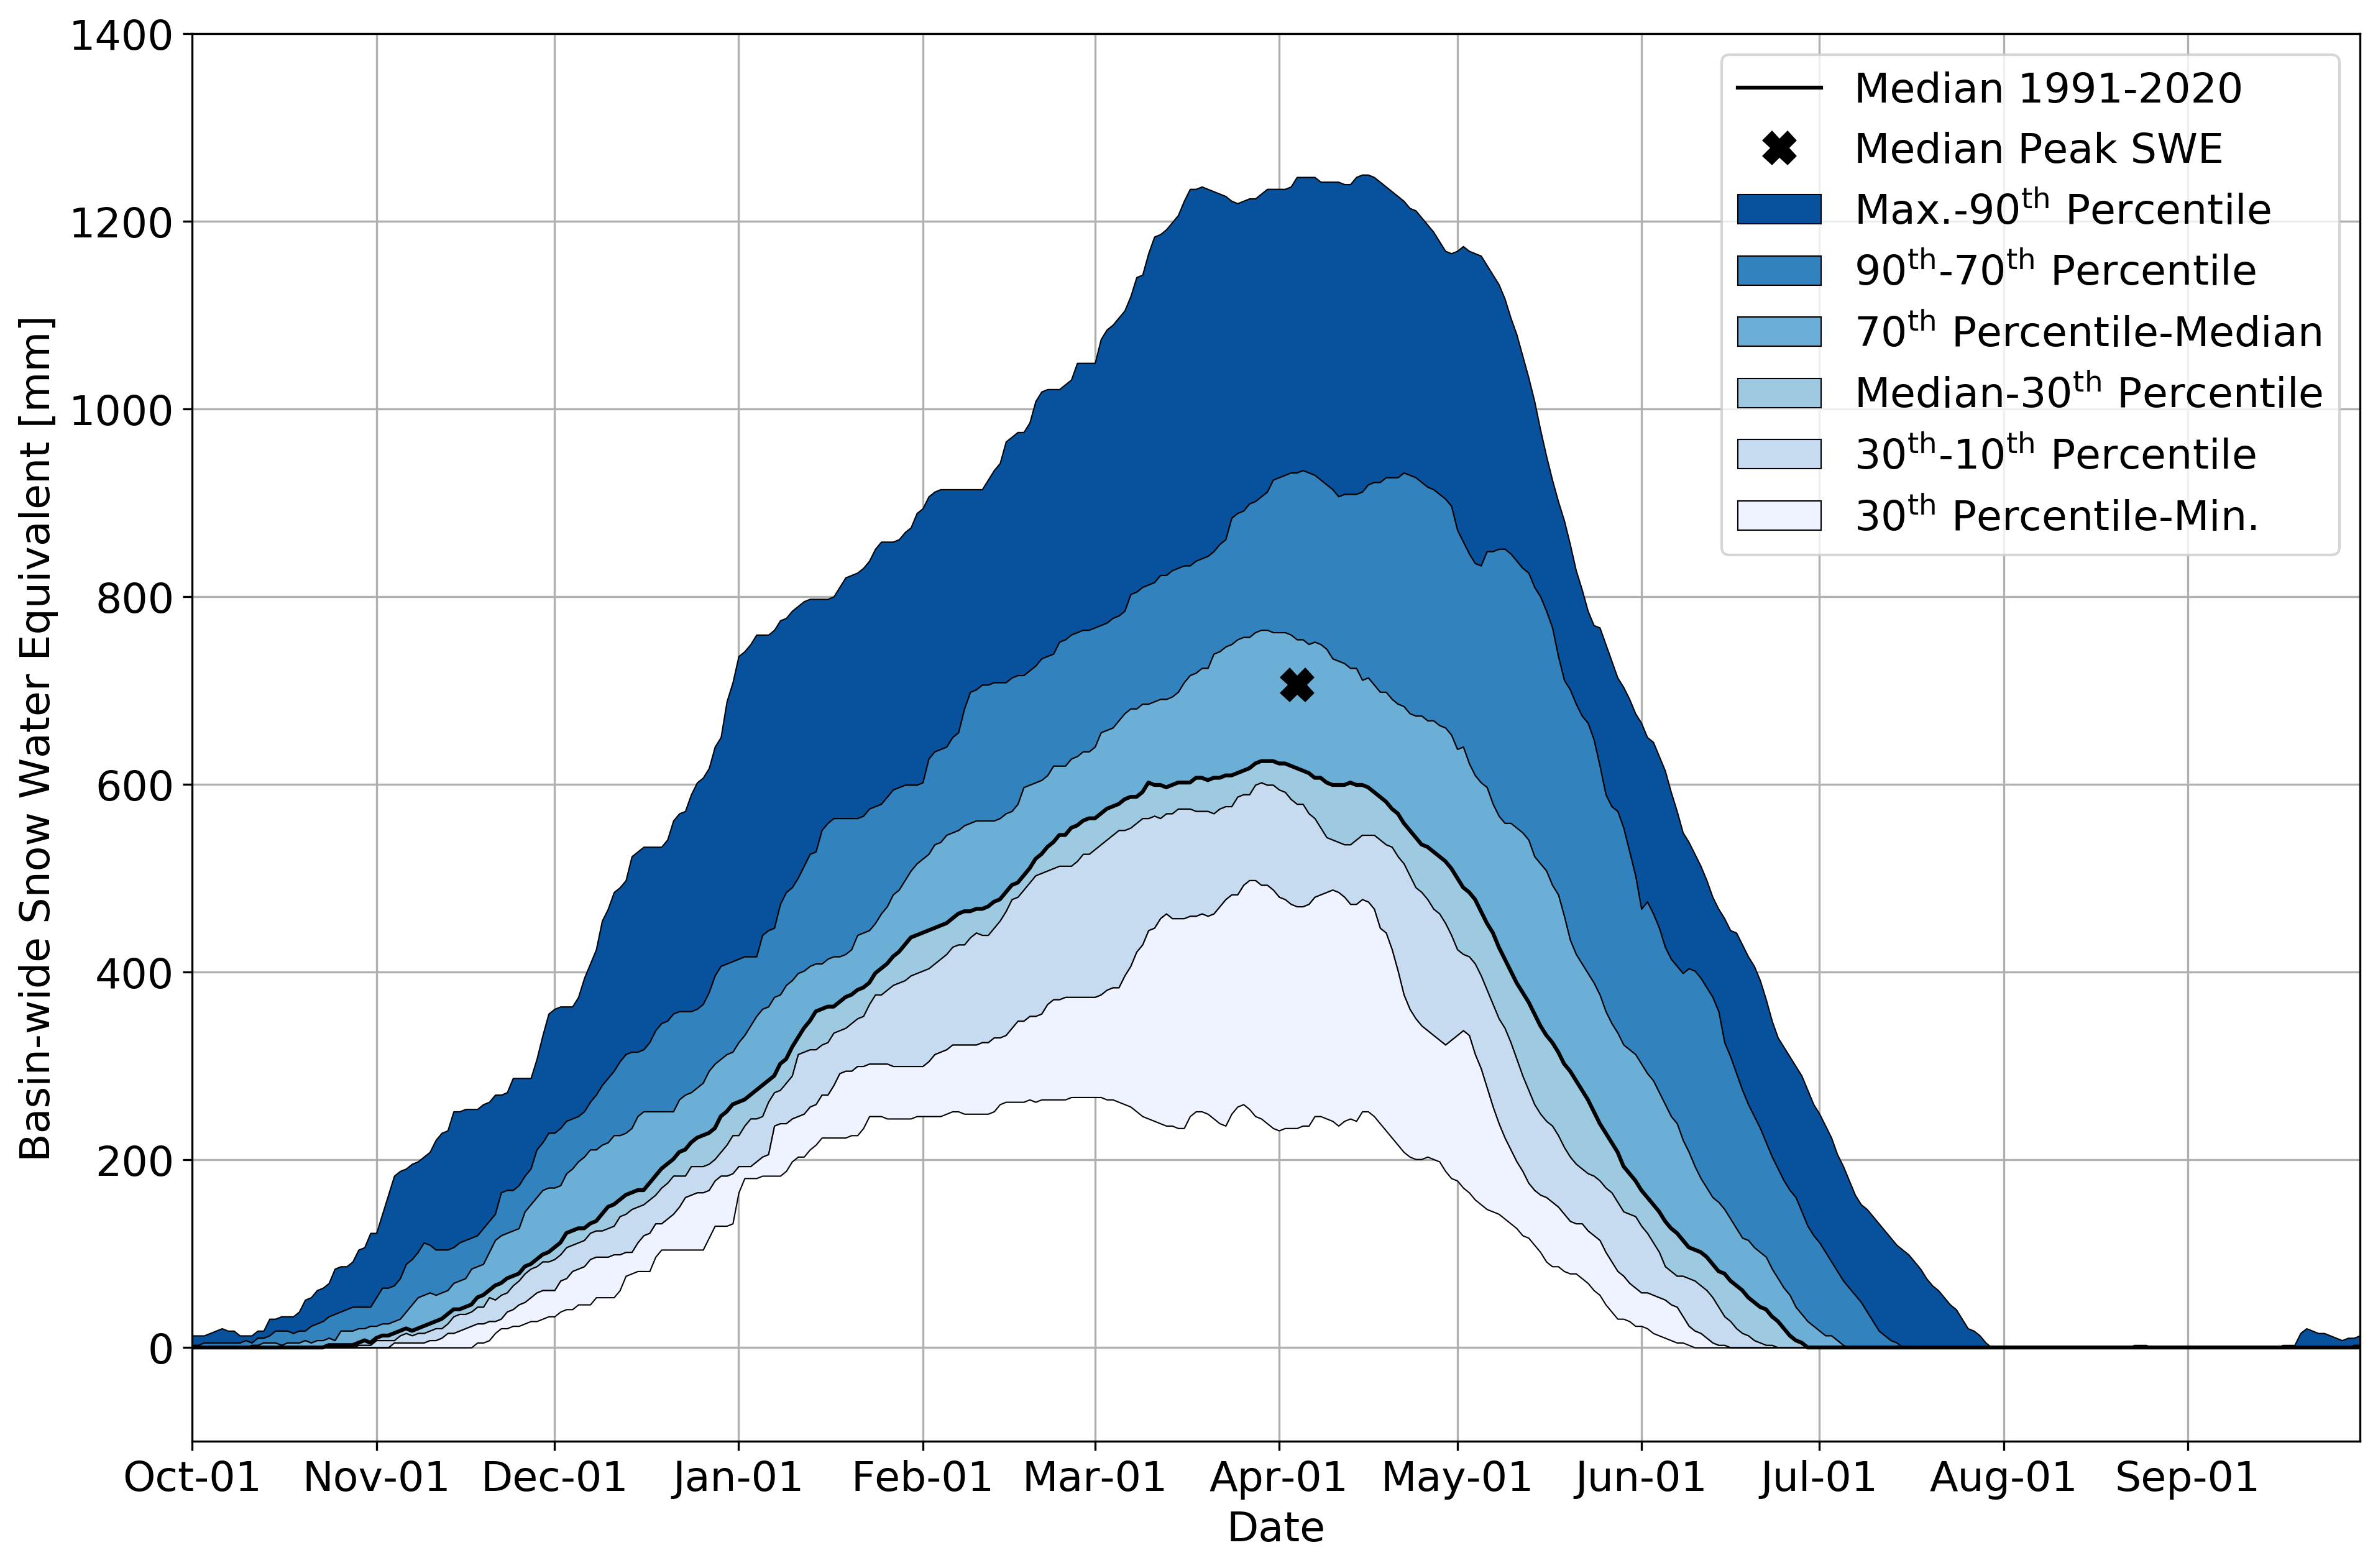

In [9]:
plt.figure(figsize=(15,10),dpi=300)
plt.rcParams.update({'font.size': 16})

plt.fill_between(dates_dt['date'].values, swe_max, swe_90, edgecolor='k', linewidth=0.5, facecolor='#08519c', label='Max.-90${}^{\mathrm{th}}$ Percentile', zorder=2.5)
plt.fill_between(dates_dt['date'].values, swe_90, swe_70, edgecolor='k', linewidth=0.5, facecolor='#3182bd', label='90${}^{\mathrm{th}}$-70${}^{\mathrm{th}}$ Percentile', zorder=2.5)
plt.fill_between(dates_dt['date'].values, swe_70, swe_median, edgecolor='k', linewidth=0.5, facecolor='#6baed6', label='70${}^{\mathrm{th}}$ Percentile-Median', zorder=2.5)
plt.fill_between(dates_dt['date'].values, swe_median, swe_30, edgecolor='k', linewidth=0.5, facecolor='#9ecae1', label='Median-30${}^{\mathrm{th}}$ Percentile', zorder=2.5)
plt.fill_between(dates_dt['date'].values, swe_30, swe_10, edgecolor='k', linewidth=0.5, facecolor='#c6dbef', label='30${}^{\mathrm{th}}$-10${}^{\mathrm{th}}$ Percentile', zorder=2.5)
plt.fill_between(dates_dt['date'].values, swe_10, swe_min, edgecolor='k', linewidth=0.5, facecolor='#eff3ff', label='30${}^{\mathrm{th}}$ Percentile-Min.', zorder=2.5)

plt.plot(dates_dt['date'].values, swe_median, color='k', linewidth=1.5, label='Median 1991-2020', zorder=2.5)
plt.plot(swe_maxdate, swe_maxmed, marker='X', linewidth=0, markersize=12, color='k', label='Median Peak SWE', zorder=2.5)

plt.grid(zorder=-10)
plt.legend()

plt.xlim([pd.to_datetime('10-01-2023', format='%m-%d-%Y'), pd.to_datetime('09-30-2024', format='%m-%d-%Y')])
plt.xlabel('Date')
plt.ylim([-100.0,1400.0])
plt.ylabel('Basin-wide Snow Water Equivalent [mm]')

ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))

plt.savefig('Spokane_SWE_v2.png', bbox_inches='tight')
plt.show()
